importing tha pandas library, so we can load the dataframe of the epilepsy patients

In [31]:
import pandas as pd



Uploading the dataframe and calling it 'df' . The df containt 20 column and 443 row before cleaning.

In [32]:
df = pd.read_csv("C:/Users/Shimon Funaro/Downloads/Metadata_Release_Anon (1).csv")
df


,ID,Sex,Binned_Onset_Age,FUS,fqFUS,FBTCS,fqFBTCS,SE,Op_Side,Op_Type,Pathology,OP MEMO,Number_ASMs,Binned_Age_at_Scan,Binned_Age_at_Surgery,ILAE_Year1,ILAE_Year2,ILAE_Year3,ILAE_Year4,ILAE_Year5
0,1,M,1 to 2,True,2.0,True,3.00,False,R,T Lx,OTHER,oligodendroglial hyperplasia,3,20 to 24,20 to 24,4.0,4.0,4.0,4.0,NaN
1,2,F,15 to 19,True,42.0,True,0.33,False,R,T Lx,HS,type 1,1,35 to 39,35 to 39,1.0,1.0,1.0,1.0,NaN
2,3,M,15 to 19,True,1.5,True,0.00,False,L,T Lesx,DNT,NaN,2,25 to 29,25 to 29,1.0,1.0,1.0,1.0,1.0
3,4,M,11 to 14,True,10.0,False,NaN,False,R,T Lx,OTHER,EFG,2,40 to 44,45 to 49,4.0,4.0,2.0,2.0,2.0
4,5,F,5 to 7,True,4.0,True,0.00,False,L,T Lx,HS,type 1; (& FCD type IIIA),2,45 to 49,45 to 49,2.0,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,459,M,11 to 14,True,0.5,False,NaN,False,L,O P Lx,FCD,type IIID,4,15 to 20,20 to 24,3.0,NaN,NaN,NaN,NaN
439,460,M,Over 40,True,14.0,True,0.25,False,L,T Lx,HS,NaN,2,45 to 49,50 to 54,1.0,1.0,1.0,1.0,1.0
440,461,M,5 to 7,True,22.0,True,0.29,False,L,T Lx,HS,NaN,2,40 to 44,40 to 44,3.0,1.0,3.0,3.0,1.0
441,462,F,15 to 19,True,56.0,True,0.00,False,L,T Lesx,CAV,NaN,1,15 to 20,15 to 20,1.0,1.0,1.0,1.0,2.0


DATA CLEANING

Importing all the cleaning functions from the src.data_cleaning 
lobe_extraction: The function extracts the lobe from the column 'Op_Type' , makes a new column called 'lobe' and inserts the extracted data 
clean_lobe_column: The function makes sure that the 'lobe' column has only one of these letters "TOPF" in each cell
remove_rows_with_too_many_nans: This function deletes rows that have over one year of missing data (NaN)
refill_nan_with_previous: The function fills the rows that are left with one year of missing data, copying the previous year
filter_rows_by_conditions: This function makes sure there are at least four of either 1 and 2 or 3 - 5, deleting the rows that are not following those rulles.
calculate_mean_age: This function calculate the mean age of the first seizure creating a new column called 'mean_age' and inserts the calculated data.

In [33]:
from src.data_cleaning import lobe_extraction 
from src.data_cleaning import clean_lobe_column
from src.data_cleaning import remove_rows_with_too_many_nans
from src.data_cleaning import refill_nan_with_previous
from src.data_cleaning import filter_rows_by_conditions
from src.data_cleaning import calculate_mean_age

Operating the functions form the cleaning on the data frame.

In [34]:
df = lobe_extraction(df,"Op_Type") 
df = clean_lobe_column(df) 
df = remove_rows_with_too_many_nans(df, ["ILAE_Year1","ILAE_Year2","ILAE_Year3","ILAE_Year4","ILAE_Year5"],1)
df = refill_nan_with_previous(df,["ILAE_Year1","ILAE_Year2","ILAE_Year3","ILAE_Year4","ILAE_Year5"])
df = filter_rows_by_conditions(df,["ILAE_Year1","ILAE_Year2","ILAE_Year3","ILAE_Year4","ILAE_Year5"],[((1, 2), 4), ((3, 5), 4)])
df = calculate_mean_age(df,"Binned_Onset_Age","mean_age")
df

,ID,Sex,Binned_Onset_Age,FUS,fqFUS,FBTCS,fqFBTCS,SE,Op_Side,Op_Type,...,Number_ASMs,Binned_Age_at_Scan,Binned_Age_at_Surgery,ILAE_Year1,ILAE_Year2,ILAE_Year3,ILAE_Year4,ILAE_Year5,lobe,mean_age
0,2,F,15 to 19,True,42.0,True,0.33,False,R,T Lx,...,1,35 to 39,35 to 39,1.0,1.0,1.0,1.0,1.0,T,17.0
1,3,M,15 to 19,True,1.5,True,0.00,False,L,T Lesx,...,2,25 to 29,25 to 29,1.0,1.0,1.0,1.0,1.0,T,17.0
2,8,F,3 to 4,True,16.0,False,NaN,False,R,P Lesx,...,3,40 to 44,40 to 44,1.0,1.0,1.0,1.0,1.0,P,3.5
3,9,F,20 to 24,True,10.0,True,0.00,False,R,T Lx,...,2,25 to 29,25 to 29,1.0,1.0,3.0,1.0,1.0,T,22.0
4,17,F,20 to 24,True,16.0,True,2.00,False,L,P Lesx,...,3,30 to 34,30 to 34,4.0,1.0,1.0,1.0,1.0,P,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,418,F,8 to 10,True,10.0,True,1.00,True,L,T Lx,...,3,40 to 44,45 to 49,3.0,4.0,3.0,4.0,4.0,T,9.0
253,423,M,20 to 24,True,10.0,True,10.00,False,L,T Lx,...,3,25 to 29,25 to 29,1.0,4.0,4.0,5.0,5.0,T,22.0
254,440,F,30 to 34,True,1.0,True,0.08,False,R,T P Lx,...,2,50 to 54,50 to 54,4.0,5.0,3.0,5.0,5.0,T,32.0
255,446,F,11 to 14,True,0.3,True,0.00,False,L,T Lx,...,3,45 to 49,45 to 49,5.0,5.0,5.0,5.0,5.0,T,12.5


TESTING:

importing the testing that is done on the cleaned data frame. 
The function will make sure that all the cells in the lobe column are letters (to be precise "TOPF"), all the cells in the ILAE_yearX column are numeric and 1-5 , and making sure of "mean_age" "lobe" and "Pathology" dont have NaN's

In [35]:
from tests.ensuring_data import get_unique_general


Operating the function

In [36]:
list_of_columns = ("Pathology","lobe","mean_age","ILAE_Year1","ILAE_Year2","ILAE_Year3","ILAE_Year4","ILAE_Year5")
get_unique_general(df,list_of_columns)
print("Yay everything is unique!!!")


Unique values in column 'Pathology':
{'OTHER', 'CAV', 'DUAL', 'DNT', 'FCD', 'HS', 'GL'}

Unique values in column 'lobe':
{'T', 'O', 'P', 'F'}

Unique values in column 'mean_age':
{np.float64(32.0), np.float64(1.0), np.float64(1.5), np.float64(3.5), np.float64(37.0), np.float64(6.0), np.float64(40.0), np.float64(9.0), np.float64(12.5), np.float64(17.0), np.float64(22.0), np.float64(27.0)}

Unique values in column 'ILAE_Year1':
{np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0)}

Unique values in column 'ILAE_Year2':
{np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0)}

Unique values in column 'ILAE_Year3':
{np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0)}

Unique values in column 'ILAE_Year4':
{np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0)}

Unique values in column 'ILAE_Year5':
{np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), n

DATA VISUALIZATION:

Importing the function that creates plotting for the relevant data, the distribuition of patients for each pathology, lobe type and mean age of first seizure.

In [37]:
from src.data_visualisation import plotting


Operating the functions:

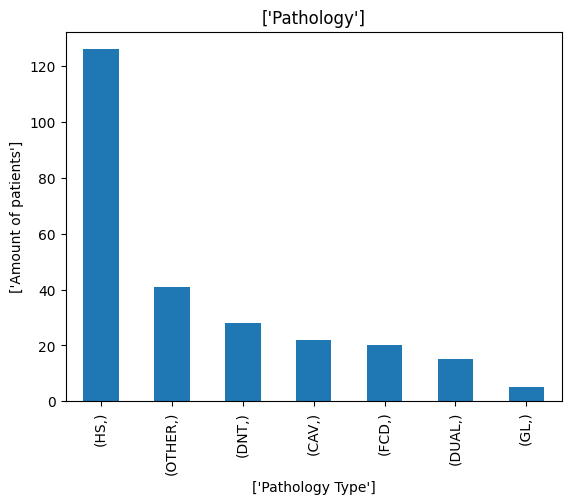

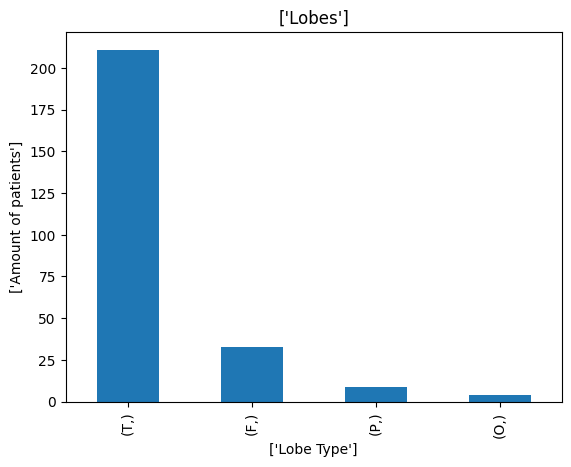

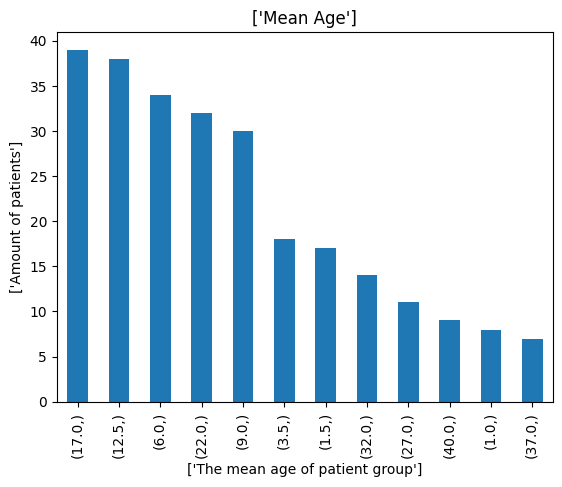

In [38]:
plotting(df,["Pathology"],["Pathology"],["Pathology Type"],["Amount of patients"])
plotting(df,["lobe"],["Lobes"],["Lobe Type"],["Amount of patients"])
plotting(df,["mean_age"],["Mean Age"],["The mean age of patient group"],["Amount of patients"])


DATA ANALYSIS:

Importing the function that calls for all functions responsabile for analysis. 
The function contains:
count_one_or_two : This function counts all the rows that has at least 4 of the "good" data and ading it to the count of each unique "lobe"/"Pathology"/"mean_age"
count_three_to_five:  This function counts all the rows that has at least 4 of the "bad" data and ading it to the count of each unique "lobe"/"Pathology"/"mean_age"
analyze_column_significant_only: This function take the count of the "bad" and "good" data fore each type in each column and does a binomic test to see if there is a statisctic significance.

In [39]:
from src.data_analysis import general_analyze


Operating the function:

In [40]:
general_analyze(df,["mean_age", "Pathology", "lobe"]) # Calling the function that will operate the analysis for each column


Found significant difference between good and bad counts for mean_age 1.5.
Good Count: 14, Bad Count: 3
P-value: 0.0127258301
--------------------------------------------------
Found significant difference between good and bad counts for mean_age 3.5.
Good Count: 15, Bad Count: 3
P-value: 0.0075378418
--------------------------------------------------
Found significant difference between good and bad counts for mean_age 6.0.
Good Count: 27, Bad Count: 7
P-value: 0.0008213953
--------------------------------------------------
Found significant difference between good and bad counts for mean_age 22.0.
Good Count: 26, Bad Count: 6
P-value: 0.0005350527
--------------------------------------------------
Found significant difference between good and bad counts for Pathology CAV.
Good Count: 17, Bad Count: 5
P-value: 0.0169005394
--------------------------------------------------
Found significant difference between good and bad counts for Pathology DUAL.
Good Count: 12, Bad Count: 3
P-value